# TP Aprendizaje de Máquina
## Dataset utilizado ["Crímenes reportados en Chicago", año 2023](https://data.cityofchicago.org/Public-Safety/Crimes-2023/xguy-4ndq/about_data) 

Integrantes:
* Mealla Pablo
* Mendoza Dante
* Vasquez Jorge
* Viñas Gustavo


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_csv = pd.read_csv("dataset/Crimes_-_2023_20250508.zip")

df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262950 entries, 0 to 262949
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    262950 non-null  int64  
 1   Case Number           262950 non-null  object 
 2   Date                  262950 non-null  object 
 3   Block                 262950 non-null  object 
 4   IUCR                  262950 non-null  object 
 5   Primary Type          262950 non-null  object 
 6   Description           262950 non-null  object 
 7   Location Description  261512 non-null  object 
 8   Arrest                262950 non-null  bool   
 9   Domestic              262950 non-null  bool   
 10  Beat                  262950 non-null  int64  
 11  District              262950 non-null  int64  
 12  Ward                  262947 non-null  float64
 13  Community Area        262950 non-null  int64  
 14  FBI Code              262950 non-null  object 
 15  

In [3]:
print(df_csv["Year"].unique())

[2023]


In [4]:
# Analizamos filas duplicadas, sin considerar las siguientes columnas
drop_columns = ["ID", "Date", "Updated On"]
df_dup = df_csv.drop(drop_columns, axis=1)

# Hacemos un muestreo de los duplicados para análisis
duplicados = df_csv[df_dup.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 42, casos: 20


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
8979,27913,JG545814,12/18/2023 05:10:00 PM,065XX S CLAREMONT AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,16.0,66,01A,1161867.0,1861265.0,2023,12/26/2023 03:41:46 PM,41.774978,-87.682170,POINT (-87.682170473 41.774977636)
9109,27914,JG545814,12/18/2023 02:25:00 PM,065XX S CLAREMONT AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,16.0,66,01A,1161867.0,1861265.0,2023,12/26/2023 03:41:46 PM,41.774978,-87.682170,POINT (-87.682170473 41.774977636)
13106,27906,JG538547,12/12/2023 06:16:00 PM,035XX W 61ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,14.0,66,01A,1153760.0,1863608.0,2023,12/20/2023 03:41:19 PM,41.781572,-87.711828,POINT (-87.711827796 41.781571789)
13107,27907,JG538547,12/12/2023 06:16:00 PM,035XX W 61ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,14.0,66,01A,1153760.0,1863608.0,2023,12/20/2023 03:41:19 PM,41.781572,-87.711828,POINT (-87.711827796 41.781571789)
29029,27871,JG510509,11/19/2023 03:00:00 PM,089XX S COTTAGE GROVE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,8.0,44,01A,1183122.0,1846020.0,2023,11/27/2023 03:41:35 PM,41.732676,-87.604726,POINT (-87.604726411 41.732675718)
29030,27872,JG510509,11/19/2023 03:00:00 PM,089XX S COTTAGE GROVE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,8.0,44,01A,1183122.0,1846020.0,2023,11/27/2023 03:41:35 PM,41.732676,-87.604726,POINT (-87.604726411 41.732675718)
35306,27853,JG499426,11/10/2023 08:52:00 PM,083XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,18.0,70,01A,1151183.0,1848997.0,2023,11/18/2023 03:40:25 PM,41.741528,-87.721657,POINT (-87.721656705 41.741527505)
35444,27851,JG499426,11/10/2023 05:22:00 PM,083XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,18.0,70,01A,1151183.0,1848997.0,2023,11/18/2023 03:40:25 PM,41.741528,-87.721657,POINT (-87.721656705 41.741527505)
35448,27852,JG499426,11/10/2023 05:16:00 PM,083XX S PULASKI RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,18.0,70,01A,1151183.0,1848997.0,2023,11/18/2023 03:40:25 PM,41.741528,-87.721657,POINT (-87.721656705 41.741527505)
40286,27835,JG490649,11/04/2023 01:05:00 AM,031XX W 39TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,12.0,58,01A,1156004.0,1878252.0,2023,11/19/2023 03:40:38 PM,41.821712,-87.703207,POINT (-87.703207097 41.821712132)


In [5]:
# Eliminamos los duplicados obtenidos, consideramos los iguales ignorando la fecha del suceso, la actualización, y el id del dataset (que no es el id del suceso).
df_csv.drop_duplicates(df_dup.columns, keep='last', inplace=True)

In [6]:
# Convertimos columnas del dataset al tipo correcto y agregamos datos extraidos de la fecha
df_csv["Date"] = pd.to_datetime(df_csv["Date"], format="%m/%d/%Y %I:%M:%S %p")
df_csv["mes"] = df_csv["Date"].dt.month
df_csv["dia_mes"] = df_csv["Date"].dt.day
df_csv["dia_semana"] = df_csv["Date"].dt.dayofweek
df_csv["hora"] = df_csv["Date"].dt.hour

categorical_cols = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code']
df_csv[categorical_cols] = df_csv[categorical_cols].astype('category')


#### PARA ANALIZAR
# Eliminamos columnas que consideramos no tienen aporte significativo, o que tiene valores únicos para cada fila (ids)
drop_columns = ["ID", "Case Number", "Block", "X Coordinate", "Y Coordinate", "Year", "Updated On", "Location"]
df_csv.drop(drop_columns, inplace=True, axis=1)

df_csv.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,mes,dia_mes,dia_semana,hora
0,2023-12-31 23:59:00,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1823,18,27.0,8,14,41.900698,-87.637330,12,31,6,23
1,2023-12-31 23:51:00,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,624,6,8.0,69,04A,41.754967,-87.602411,12,31,6,23
2,2023-12-31 23:51:00,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,935,9,20.0,37,04A,41.801584,-87.633177,12,31,6,23
3,2023-12-31 23:50:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,923,9,14.0,63,08B,41.800201,-87.691535,12,31,6,23
4,2023-12-31 23:50:00,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,122,1,42.0,32,06,41.886816,-87.631524,12,31,6,23


In [7]:
# Info de columnas numéricas
display(df_csv.describe())

# Info de columnas categóricas
display(df_csv.describe(include='category'))

# Valores faltantes
missing_data = df_csv.isnull().sum()
missing_data = missing_data[missing_data>0]
print(f"Valores faltantes:\n{missing_data.sort_values(ascending = False)}")


,Date,Latitude,Longitude,mes,dia_mes,dia_semana,hora
count,262928,261224.000000,261224.000000,262928.000000,262928.000000,262928.000000,262928.000000
mean,2023-07-05 00:22:40.910035712,41.846525,-87.668780,6.612498,15.582433,3.033290,12.496296
min,2023-01-01 00:00:00,41.644590,-87.939733,1.000000,1.000000,0.000000,0.000000
25%,2023-04-08 12:00:00,41.770850,-87.710219,4.000000,8.000000,1.000000,8.000000
50%,2023-07-07 15:30:00,41.863589,-87.662214,7.000000,16.000000,3.000000,13.000000
75%,2023-10-01 00:00:00,41.910007,-87.626819,10.000000,23.000000,5.000000,18.000000
max,2023-12-31 23:59:00,42.022549,-87.524532,12.000000,31.000000,6.000000,23.000000
std,NaN,0.087310,0.059533,3.387260,8.852286,2.002805,6.898362


,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code
count,262928,262928,262928,261490,262928,262928,262925.0,262928,262928
unique,321,31,299,132,275,23,50.0,77,26
top,0810,THEFT,SIMPLE,STREET,1834,8,27.0,25,06
freq,20760,57479,29958,77657,3248,16999,12038.0,12679,57480


Valores faltantes:
Longitude               1704
Latitude                1704
Location Description    1438
Ward                       3
dtype: int64


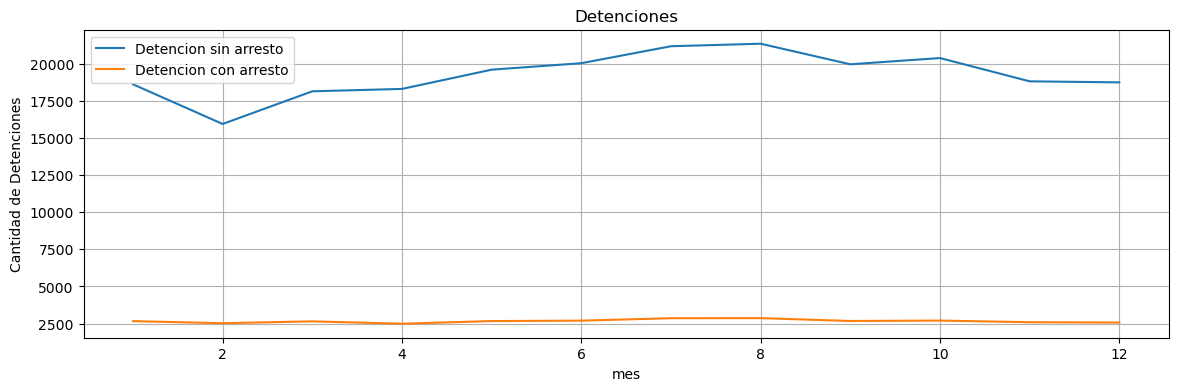

In [8]:
detencion_con_arresto = df_csv[df_csv['Arrest'] == True].groupby('mes').size()
detencion_sin_arresto = df_csv[df_csv['Arrest'] == False].groupby('mes').size()

#print(detencion_con_arresto)
#print(detencion_sin_arresto)

plt.figure(figsize=(14, 4))

plt.plot(detencion_sin_arresto, label="Detencion sin arresto")
plt.plot(detencion_con_arresto, label="Detencion con arresto")


# Títulos y etiquetas
plt.title("Detenciones")
plt.xlabel("mes")
plt.ylabel("Cantidad de Detenciones")
plt.legend()
plt.grid(True)

plt.show()


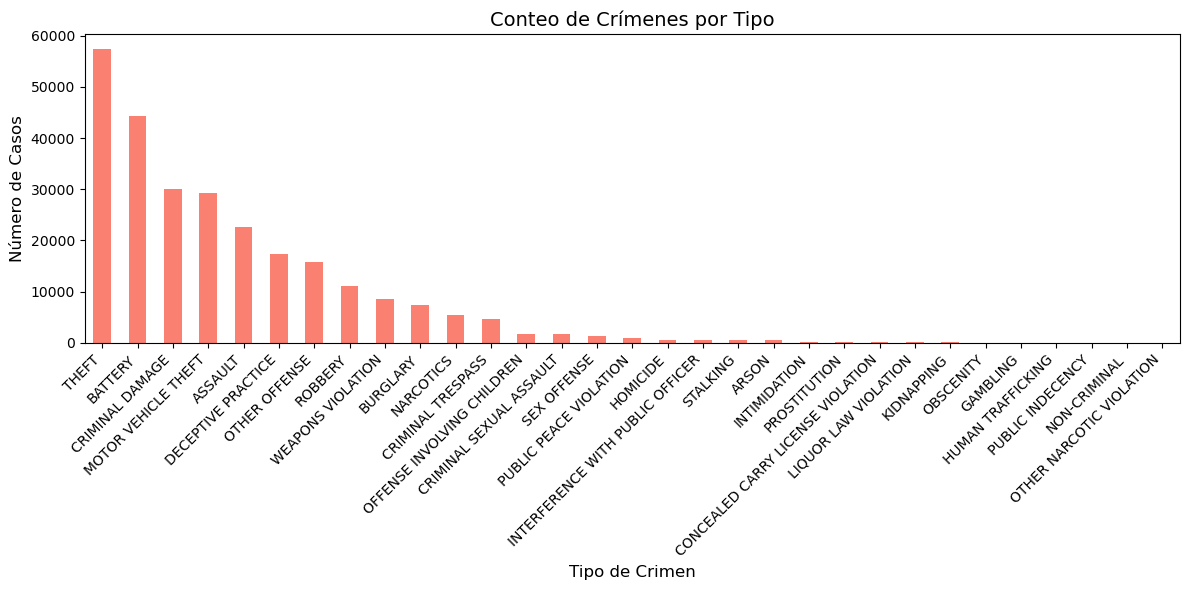

In [9]:
#Conteo de crímenes por tipo
# Paso 2: Contar los crímenes por tipo (columna 'Primary Type')
crimenes_por_tipo = df_csv['Primary Type'].value_counts().sort_values(ascending=False)

# Paso 3: Graficar en un gráfico de barras
plt.figure(figsize=(12, 6))
crimenes_por_tipo.plot(kind='bar', color='salmon')

# Etiquetas y título
plt.title('Conteo de Crímenes por Tipo', fontsize=14)
plt.xlabel('Tipo de Crimen', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Ajustes de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Ajuste del layout para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<Axes: >

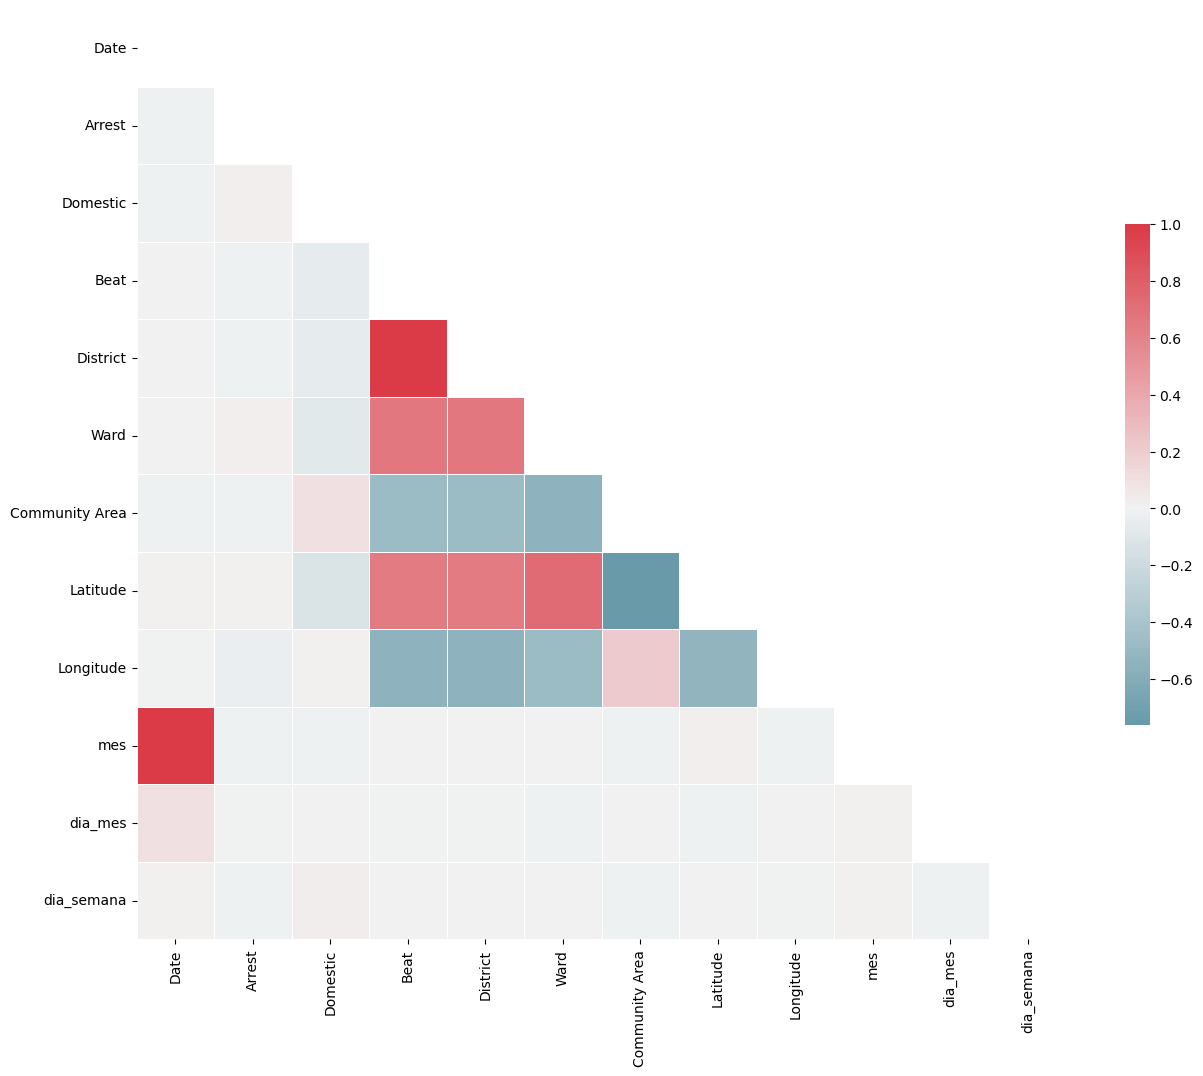

In [10]:
corr_cols = ['Date', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 
 'Latitude', 'Longitude', 'mes', 'dia_mes', 'dia_semana', 'hora']
df_corr = df_csv[corr_cols]
corr = df_corr.corr(method = 'pearson') #.sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:12,0:12], mask=mask[0:12,0:12], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

In [11]:
print(df_csv.columns.values)

['Date' 'IUCR' 'Primary Type' 'Description' 'Location Description'
 'Arrest' 'Domestic' 'Beat' 'District' 'Ward' 'Community Area' 'FBI Code'
 'Latitude' 'Longitude' 'mes' 'dia_mes' 'dia_semana' 'hora']
